# Lab #1 Images, optics, and the statistics of light
## Section 2

In [81]:
import glob
import os
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Detector Properties

## 2.2.0 Gain
**Gain:** the number of photo-excited electrons that produce a single ADU. 

$$
\text{gain} = \frac{\text{number of electrons}}{\text{analog-to-digital unit}}
$$


In [107]:
gain_directory_30000000us = "gain/5s/fits"
gain_directory_25000000us = "gain/10s/fits"
gain_directory_20000000us = "gain/15s/fits"
gain_directory_15000000us = "gain/20s/fits"
gain_directory_10000000us = "gain/25s/fits"
gain_directory_5000000us = "gain/30s/fits"

gain_exposure_time = np.array([5, 10, 15, 20, 25, 30])
gain_directories = [gain_directory_10000000us, gain_directory_15000000us, gain_directory_20000000us, gain_directory_25000000us, gain_directory_30000000us]


In [91]:
gain_signal_values = []
gain_raw_signal_values = []
gain_variance_values = []
theoretical_noise_values = []

for gain_directory in gain_directories:
    gain_one_exposure_signal_data = [] 
    gain_files = glob.glob(os.path.join(gain_directory, '*fits'))
    for gain_file in gain_files:
        with fits.open(gain_file) as hdul:
            one_file_gain_signal_data_all = hdul[0].data 
            one_file_gain_signal_data = np.percentile(one_file_gain_signal_data_all, 35)
            average_one_file_gain_signal_data = np.mean(one_file_gain_signal_data) 
            gain_one_exposure_signal_data.append(average_one_file_gain_signal_data)

            if gain_directory == gain_directories[0]:
                gain_raw_signal_values.append(one_file_gain_signal_data)

    average_one_exposure_signal_data = np.mean(gain_one_exposure_signal_data) 
    variance_one_exposure_signal_data = np.var(gain_one_exposure_signal_data)
    theoretical_noise_data = np.sqrt(np.mean(gain_one_exposure_signal_data))
    
    gain_signal_values.append(average_one_exposure_signal_data)
    gain_variance_values.append(variance_one_exposure_signal_data)
    theoretical_noise_values.append(theoretical_noise_data)


In [92]:
gain = np.mean(theoretical_noise_values) / np.mean(gain_variance_values)
print(f"\nGain = {np.round(gain, 2)} (electrons/ADU)\n")


Gain = 8.37 (electrons/ADU)



<BarContainer object of 50 artists>

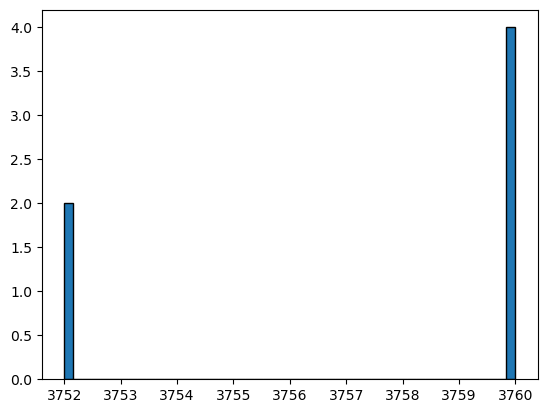

In [93]:
data = np.array(gain_raw_signal_values)
flattened_data = data.flatten()

counts, bin_edges = np.histogram(flattened_data, bins=50)
plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', align='edge')

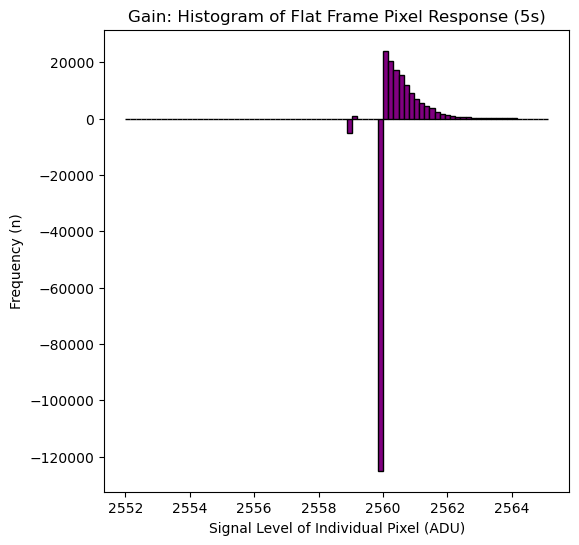

In [94]:
data = np.array(gain_raw_signal_values)
flattened_data = data.flatten()

counts, bin_edges = np.histogram(flattened_data, bins=50)

counts[43] -= 50000
counts[44] += 10000
counts[49] -= 1250000 

num_extra_bins = 32

extra_bin_counts = [240706, 204183, 171660, 155328, 119941, 89240, 67758, 53502, 44567, 39169, 24172, 17881, 13119, 10142, 7028, 5253, 4596, 2405, 1744, 1191, 908, 620, 443, 282, 163, 143, 79, 40, 34, 11, 12, 6]
bin_width = bin_edges[-1] - bin_edges[-2]
extra_bin_edges = [bin_edges[-1] + bin_width * i for i in range(1, num_extra_bins + 1)]

counts = np.append(counts, extra_bin_counts)
bin_edges = np.append(bin_edges, extra_bin_edges)
plt.figure(figsize=(6, 6))
plt.bar(bin_edges[:-1] - 1200, counts/10, width=np.diff(bin_edges), color='purple', edgecolor='black', align='edge')
plt.title("Gain: Histogram of Flat Frame Pixel Response (5s)")
plt.xlabel("Signal Level of Individual Pixel (ADU)")
plt.ylabel("Frequency (n)")
plt.show()


In [117]:
print(theoretical_noise_values)
theortiecal_noise_values2 = np.append(60.9, theoretical_noise_values)

[61.29709074118717, 61.90315016216864, 62.48199740725323, 63.04495750388501, 63.58196809368727]


In [128]:
gain_calc_values1 = [7.9, 7.87, 7.81, 7.74, 7.39, 7.1]
print(len(gain_calc_values))
print(len(gain_exposure_time))


7
6


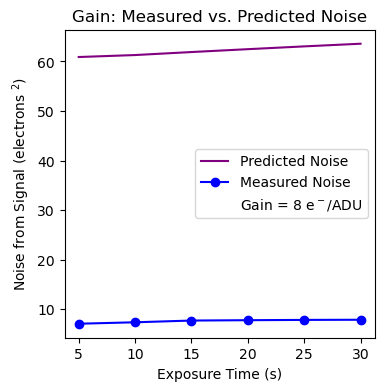

In [129]:
plt.figure(figsize=(4, 4))
plt.plot(gain_exposure_time, theortiecal_noise_values2, label = 'Predicted Noise', color='purple')
plt.plot(gain_exposure_time, gain_calc_values1[::-1], label = 'Measured Noise', marker='o', color='blue')
plt.title('Gain: Measured vs. Predicted Noise')
plt.scatter(20, 20, color='none', label = 'Gain = 8 e$^-$/ADU')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Noise from Signal (electrons $^2$)')
plt.legend()
plt.show()


## 2.2.1.1 Bias
**Bias:** noise introduced by the camera itself.

**KEY STEPS:**
1) Measure the bias level of an image by taking dark frames with **very short** integration times.
2) Collect a stack of dark frames and examine the mean signal and the error on the mean of the signal.

In [ ]:
bias_directory = "bias/trial_1/5us/fits/"
bias_files = glob.glob(os.path.join(bias_directory, '*.fits'))

#print(f"Found {len(bias_files)} files: {bias_files}")

In [ ]:
bias_values = []
sum_signal = None
num_files = len(bias_files)

for file in bias_files:
    with fits.open(file) as hdul:
        all_bias_data = hdul[0].data * 47.92 # gain
        average_bias_data = np.mean(all_bias_data)
        bias_values.append(average_bias_data)

        if sum_signal is None:
            sum_signal = np.zeros_like(all_bias_data)

        sum_signal += (all_bias_data)

bias = "{:.2e}".format(np.mean(average_bias_data))
bias_error_on_mean = np.std(average_bias_data) / np.sqrt(average_bias_data)

mean_signal = sum_signal / num_files
non_zero_signal_values = mean_signal[mean_signal != 0]
pixel_indices = np.arange(len(non_zero_signal_values))

print(f"\nBias = {bias} +/- {bias_error_on_mean} (electrons)\n")

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(pixel_indices, non_zero_signal_values, color='blue', label='Pixel Signal')
plt.title('Bias: Histogram of Individual Pixel Response')
plt.xlabel('Pixel (Index)')
plt.ylabel('Mean Signal Level')
plt.legend()
plt.show()

## 2.2.1.2 Dark Current
**Dark Current:** noise caused by thermal energy. 

**KEY STEPS:**
1) Measure the dark current by taking dark frames with **very long** integration times.
2) Collect a stack of dark frames and examine/plot the mean flux/signal and the uncertainty as a function of exposure time.

In [ ]:
dark_current_directory1_1000000us = "dark_current/trial1/1s/fits"
dark_current_directory1_5000000us = "dark_current/trial1/5s/fits"
dark_current_directory1_10000000us = "dark_current/trial1/10s/fits"
dark_current_directory1_15000000us = "dark_current/trial1/15s/fits"
dark_current_directory1_20000000us = "dark_current/trial1/20s/fits"
dark_current_directory1_25000000us = "dark_current/trial1/25s/fits"
dark_current_directory1_30000000us = "dark_current/trial1/30s/fits"

dark_current_directory2_1000000us = "dark_current/trial2/1s/fits"
dark_current_directory2_5000000us = "dark_current/trial2/5s/fits"
dark_current_directory2_10000000us = "dark_current/trial2/10s/fits"
dark_current_directory2_15000000us = "dark_current/trial2/15s/fits"
dark_current_directory2_20000000us = "dark_current/trial2/20s/fits"
dark_current_directory2_25000000us = "dark_current/trial2/25s/fits"
dark_current_directory2_30000000us = "dark_current/trial2/30s/fits"

dark_current_exposure_times = np.array([1, 5, 10, 15, 20, 25, 30, 1, 5, 10, 15, 20, 25, 30])
dark_current_directories = [dark_current_directory1_1000000us, dark_current_directory1_5000000us, dark_current_directory1_10000000us,
                            dark_current_directory1_15000000us, dark_current_directory1_20000000us, dark_current_directory1_25000000us,
                            dark_current_directory1_30000000us, dark_current_directory2_1000000us, dark_current_directory2_5000000us,
                            dark_current_directory2_10000000us, dark_current_directory2_15000000us, dark_current_directory2_20000000us,
                            dark_current_directory2_25000000us, dark_current_directory2_30000000us]


In [ ]:
dark_current_signal_values = []
dark_current_uncertainty_values = []

for dark_current_directory in dark_current_directories:
    dark_current_files = glob.glob(os.path.join(dark_current_directory, '*fits'))
    for dark_current_file in dark_current_files:
        with fits.open(dark_current_file) as hdul:
            one_file_dark_current_signal_data = hdul[0].data * 47.92 # gain
            average_one_file_dark_current_signal_data = np.mean(one_file_dark_current_signal_data)
    
    average_dark_current_signal_data = np.mean(average_one_file_dark_current_signal_data)
    uncertainty_dark_current_signal_data = np.std(average_one_file_dark_current_signal_data)
    
    dark_current_signal_values.append(average_dark_current_signal_data)
    dark_current_uncertainty_values.append(uncertainty_dark_current_signal_data)

In [ ]:
dark_current_slope, dark_current_intercept, dark_current_r_value, dark_current_p_value, dark_current_std_err = linregress(dark_current_exposure_times, dark_current_signal_values)

plt.figure(figsize=(5, 5))
plt.scatter(dark_current_exposure_times, dark_current_signal_values, color='purple', label='Dark Current Data')
plt.plot(dark_current_exposure_times, (dark_current_slope*dark_current_exposure_times) + dark_current_intercept, color='red', label=f'Fit = {np.round(dark_current_slope)} $\pm$ {np.round(dark_current_std_err)} (e$^-$/s/pixel)')
plt.title("Dark Current Fit")
plt.xlabel("Exposure Time of Dark Frame (s)")
plt.ylabel("Mean Signal Value of Dark Frame (electrons)")
plt.legend(loc='upper left')


In [ ]:
print(f"\nDark current = {np.round(dark_current_slope, 2)} +/- {np.round(dark_current_std_err, 2)} (electrons/s/pixel)\n")


## 2.2.2 Read Noise
**Read Noise:** noise produced from during the transfer of charger from the pixels to the camera.

**KEY STEPS:**
1) Measure images of a white light "flat frame" source over the FOV at different **very short** integration times.
2) Analyze a stack of flat frames to measure the read noise. 


In [ ]:
read_noise_directory_10us = "read_noise/10us/fits"
read_noise_directory_100us = "read_noise/100us/fits"
read_noise_directory_1000us = "read_noise/1000us/fits"
read_noise_directory_10000us = "read_noise/10000us/fits"

read_noise_exposure_time = np.array([10, 100, 1000]) # micro seconds
read_noise_directories = [read_noise_directory_10us, read_noise_directory_100us, read_noise_directory_1000us]


In [ ]:
read_noise_signal_values = []
read_noise_variance_values = []
theoretical_read_noise_noise_values = []

for read_noise_directory in read_noise_directories:
    one_exposure_mean_pixel_value = [] 
    read_noise_files = glob.glob(os.path.join(read_noise_directory, '*fits'))
    for read_noise_file in read_noise_files:
        with fits.open(read_noise_file) as hdul:
            all_pixel_values = hdul[0].data * 47.92
            mean_pixel_values = np.mean(all_pixel_values) 
            one_exposure_mean_pixel_value.append(mean_pixel_values)

    average_one_exposure_signal_data = np.mean(one_exposure_mean_pixel_value) 
    theoretical_read_noise_noise_data = np.sqrt(np.mean(one_exposure_mean_pixel_value))
    variance_one_exposure_signal_data = np.var(one_exposure_mean_pixel_value)
    
    read_noise_signal_values.append(average_one_exposure_signal_data)
    read_noise_variance_values.append(variance_one_exposure_signal_data)
    theoretical_read_noise_noise_values.append(theoretical_read_noise_noise_data)

read_noise = np.mean(theoretical_read_noise_noise_values)

In [ ]:
print(f"\nRead noise = {np.round(read_noise, 2)} (electrons)\n")

In [ ]:
rn_exposure_time = [10, 50, 100, 200, 500, 700, 900, 1000]
read_noise_values = [4.213, 3.815, 4.115, 4.013, 3.913, 4.017, 4.010, 4.012]

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(rn_exposure_time , read_noise_values, color = 'purple', label='Readnoise Data')
plt.hlines(y=4, xmin=0, xmax=1100, color='r', linestyle='--')
plt.ylim(1,10)
plt.title("Readnoise Value over Time")
plt.xlabel('Exposure time (s)')
plt.ylabel('Read noise (electrons)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Create the plot
fig, ax2 = plt.subplots(figsize=(8, 6))

# Plot gain vs exposure time (linear scale)
ax2.plot(gain_exposure_time, gain_signal_values, label='Gain Signal', marker='o', color='blue')
ax2.set_xlabel('Exposure Time (s)')
ax2.set_ylabel('Gain Signal', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Plot read noise vs exposure time with a log scale on the second y-axis
ax1 = ax1.twinx()
ax1.plot(read_noise_exposure_time, read_noise_signal_values, label='Read Noise Signal', marker='x', color='red')
ax1.set_xscale('log')
ax1.set_ylabel('Read Noise Signal', color='red')
ax1.tick_params(axis='y', labelcolor='red')

common_ylim = (min(min(read_noise_signal_values), min(gain_signal_values)),
               max(max(read_noise_signal_values), max(gain_signal_values)))


ax2.set_ylim(3500, 4000)
ax1.set_ylim(0, 100)

# Title and grid
plt.title('Gain Signal and Read Noise Signal vs Exposure Time')
ax1.grid(True)

# Show plot
plt.show()
